# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Tom 4263
# student 2: Dor 4513

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data reading
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
print("train set head\n")
print (train_df.head())
print("\n")
print("train set head\n")
print(test_df.head())

train set head

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


train set head

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [4]:
#EDA 

#Statistics (1)

train_stats = train_df.describe(include='all')
test_stats = test_df.describe(include='all')
print("Statistics of train-set\n",train_stats,"\n")
print("\n")
print("Statistics of test-set\n",test_stats,"\n")

print("\n")
#Statistics (2)

train_corr = train_df.corr()
test_corr = test_df.corr()

print("Corr of train-set\n",train_corr,"\n")
print("\n")
print("Corr of test-set\n",test_corr,"\n")




Statistics of train-set
            Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    

C:\Users\tomel\AppData\Local\Temp\ipykernel_21016\4208816145.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_survival = train_df.groupby('Age_bin')['Survived'].mean().reset_index()
c:\ProgramData\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


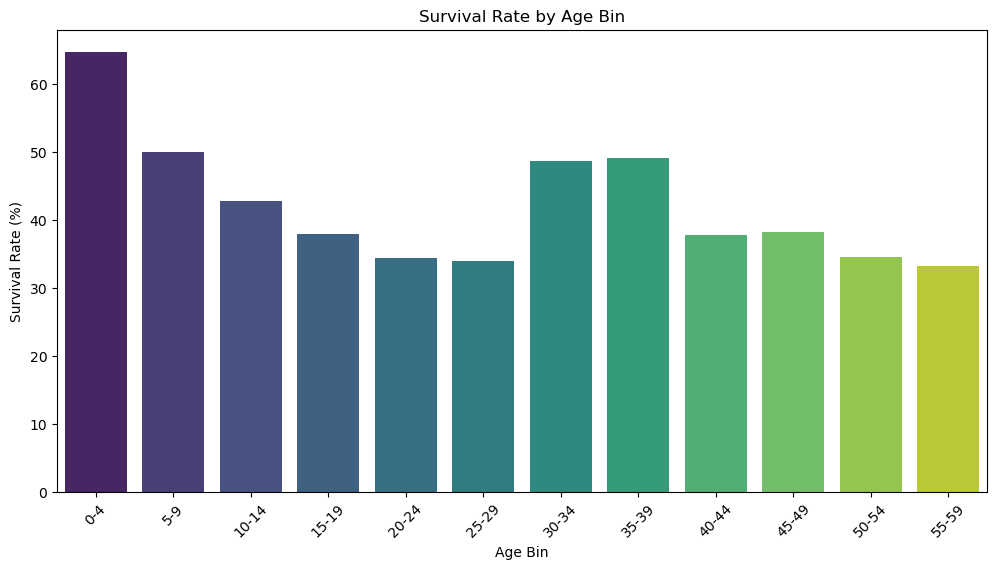

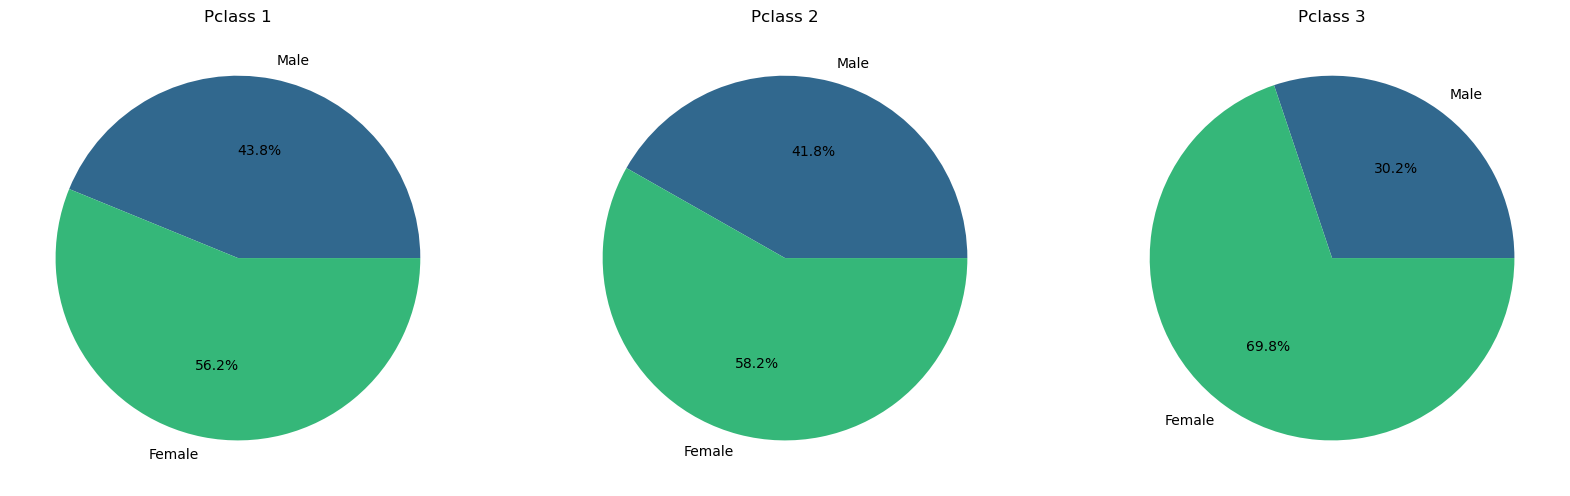

In [5]:
# Visualization (3)
# Survivals by Age bin

bins = range(0, 65, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
train_df['Age_bin'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

age_bin_survival = train_df.groupby('Age_bin')['Survived'].mean().reset_index()
age_bin_survival['Survival_rate'] = age_bin_survival['Survived'] * 100  # Convert to percentage

plt.figure(figsize=(12, 6))
sns.barplot(data=age_bin_survival, x='Age_bin', y='Survival_rate', palette='viridis')
plt.title('Survival Rate by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Visualization (4)
# Peoples in Pclass by Gender(Sex)

pclass_sex_counts = train_df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
pclasses = pclass_sex_counts['Pclass'].unique()
fig, axes = plt.subplots(1, len(pclasses), figsize=(20, 6))
colors = sns.color_palette('viridis', 2)

for i, pclass in enumerate(pclasses):
    pclass_data = pclass_sex_counts[pclass_sex_counts['Pclass'] == pclass]
    axes[i].pie(pclass_data['Count'], labels=['Male', 'Female'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Pclass {pclass}')

plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [6]:

def prepare_and_scale_data(train_df, test_df):
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    
    X_train_no_scaling = train_df[features]
    y_train = train_df['Survived']
    X_test_no_scaling = test_df[features]
    y_test = test_df['Survived']
    
    print("\nX_train without scaling:")
    print(X_train_no_scaling.head().to_string(index=False))
    print("\nX_test without scaling:")
    print(X_test_no_scaling.head().to_string(index=False))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_no_scaling)
    X_test_scaled = scaler.transform(X_test_no_scaling)
    
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)
    
    print("\nX_train with scaling:")
    print(X_train_scaled_df.head().to_string(index=False))
    print("\nX_test with scaling:")
    print(X_test_scaled_df.head().to_string(index=False))
    
    return (X_train_no_scaling, y_train, X_test_no_scaling, y_test, 
            X_train_scaled, X_test_scaled)

(X_train_no_scaling, y_train, X_test_no_scaling, y_test, 
 X_train_scaled, X_test_scaled) = prepare_and_scale_data(train_df, test_df)


X_train without scaling:
 Pclass  Sex  Age  SibSp  Parch    Fare  Embarked
      1    0 54.0      1      0 78.2667         1
      2    0 45.0      0      0 13.5000         0
      3    1 20.0      0      0  9.5000         0
      3    1 36.0      0      0  7.8958         0
      3    1 22.0      0      0  8.0500         0

X_test without scaling:
 Pclass  Sex       Age  SibSp  Parch    Fare  Embarked
      3    1 35.000000      0      0  7.0500         0
      3    1 30.000000      0      0  7.2500         0
      3    1 29.699118      0      0 14.5000         0
      3    0 21.000000      0      0  7.7500         2
      3    1 32.000000      0      0 56.4958         0

X_train with scaling:
   Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
-1.539037 -1.334635  1.856683  0.447601 -0.479528  0.921411  0.966584
-0.350540 -1.334635  1.173766 -0.500887 -0.479528 -0.379097 -0.573031
 0.837957  0.749269 -0.723225 -0.500887 -0.479528 -0.459416 -0.573031
 0.837957  0.749

In [7]:
# Grid search with cross validation
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Evaluation accuracy and recall of model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)  
    accuracy = accuracy_score(y_test, predictions)  
    report = classification_report(y_test, predictions, target_names=['Not Survived', 'Survived'])
    return accuracy, report

# range parameters of KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9], 
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

# range parameters of Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 9], 
    'max_leaf_nodes': [10, 20, 30, 40, 50] 
}

# KNN without scaling
knn_best_no_scaling, knn_best_params_no_scaling = perform_grid_search(
    KNeighborsClassifier(), knn_param_grid, X_train_no_scaling, y_train
)

# KNN with scaling
knn_best_scaled, knn_best_params_scaled = perform_grid_search(
    KNeighborsClassifier(), knn_param_grid, X_train_scaled, y_train
)

# evaluation of KNN without scaling
accuracy_knn_no_scaling, report_knn_no_scaling = evaluate_model(knn_best_no_scaling, X_test_no_scaling, y_test)

# evaluation of KNN with scaling
accuracy_knn_scaled, report_knn_scaled = evaluate_model(knn_best_scaled, X_test_scaled, y_test)

# Decision Tree without scaling
dt_best_no_scaling, dt_best_params_no_scaling = perform_grid_search(
    DecisionTreeClassifier(), dt_param_grid, X_train_no_scaling, y_train
)

# Decision Tree with scaling
dt_best_scaled, dt_best_params_scaled = perform_grid_search(
    DecisionTreeClassifier(), dt_param_grid, X_train_scaled, y_train
)

# evaluation of Decision Tree without scaling
accuracy_dt_no_scaling, report_dt_no_scaling = evaluate_model(dt_best_no_scaling, X_test_no_scaling, y_test)

# evaluation of Decision Tree with scaling
accuracy_dt_scaled, report_dt_scaled = evaluate_model(dt_best_scaled, X_test_scaled, y_test)

# results date frame
results = pd.DataFrame({
    'Model': ['KNN', 'KNN', 'Decision Tree', 'Decision Tree'],  # שם המודל
    'Scaling': ['No', 'Yes', 'No', 'Yes'],  
    'Accuracy': [accuracy_knn_no_scaling, accuracy_knn_scaled, accuracy_dt_no_scaling, accuracy_dt_scaled],  
    'F1-Score': [
        classification_report(y_test, knn_best_no_scaling.predict(X_test_no_scaling), output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, knn_best_scaled.predict(X_test_scaled), output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, dt_best_no_scaling.predict(X_test_no_scaling), output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, dt_best_scaled.predict(X_test_scaled), output_dict=True)['macro avg']['f1-score']
    ]
})

# Data frame of the best results
best_params_results = pd.DataFrame({
    'Model': ['KNN No Scaling', 'KNN Scaling', 'Decision Tree No Scaling', 'Decision Tree Scaling'],
    'Best Hyperparameters': [knn_best_params_no_scaling, knn_best_params_scaled, dt_best_params_no_scaling, dt_best_params_scaled]
})

print("\nKNN without scaling - Test results:")
print(f"Accuracy: {accuracy_knn_no_scaling}")
print(report_knn_no_scaling)

print("\nKNN with scaling - Test results:")
print(f"Accuracy: {accuracy_knn_scaled}")
print(report_knn_scaled)

print("\nDecision Tree without scaling - Test results:")
print(f"Accuracy: {accuracy_dt_no_scaling}")
print(report_dt_no_scaling)

print(f"Accuracy: {accuracy_dt_scaled}")
print(report_dt_scaled)

print("\nComparison of models with and without scaling:")
print(results.to_markdown(index=False))

print("\nBest hyperparameters combinations:")
print(best_params_results.to_markdown(index=False))


KNN without scaling - Test results:
Accuracy: 0.7653631284916201
              precision    recall  f1-score   support

Not Survived       0.80      0.86      0.83       118
    Survived       0.69      0.57      0.62        61

    accuracy                           0.77       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.76      0.77      0.76       179


KNN with scaling - Test results:
Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

Not Survived       0.89      0.87      0.88       118
    Survived       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Decision Tree without scaling - Test results:
Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

Not Survived       0.85      0.93      0.89       118
    Survived       0.84      0.6

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [8]:
best_model_name = "Decision Tree without scaling"
best_params = {'max_depth': 9, 'max_leaf_nodes': 20}

print("\n==========================")
print("The best combination:")
print("==========================")
print(f"Model: {best_model_name}")
print(f"Hyper parameters: {best_params}")
print("==========================")

best_model = DecisionTreeClassifier(max_depth=best_params['max_depth'], max_leaf_nodes=best_params['max_leaf_nodes'])

best_model.fit(X_train_no_scaling,y_train)

print("\n==========================")
print("The model has been successfully trained on the training data")
print("==========================")



The best combination:
Model: Decision Tree without scaling
Hyper parameters: {'max_depth': 9, 'max_leaf_nodes': 20}

The model has been successfully trained on the training data


## Part 5 - Apply on test and show model performance estimation

In [9]:
test_preds = best_model.predict(X_test_no_scaling)

print("\n==========================")
print("First classifications on the test set")
print("==========================")
print(test_preds[:10])  
print("==========================")

accuracy_test = accuracy_score(y_test, test_preds)
report_dict = classification_report(y_test, test_preds, target_names=['Not Survived', 'Survived'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df = report_df[['precision', 'recall', 'f1-score', 'support']].loc[['Not Survived', 'Survived']]
report_df['support'] = report_df['support'].astype(int)  # Converting support to integers

print("\n==========================")
print("Model performance on the test set")
print("==========================")
print(report_df)
print("==========================")

print("\n==========================")
print("Model accuracy on the test set")
print("==========================")
print(f"Accuracy: {accuracy_test:.6f}")
print("==========================")


First classifications on the test set
[0 0 0 1 0 0 0 0 1 0]

Model performance on the test set
              precision    recall  f1-score  support
Not Survived   0.840909  0.940678  0.888000      118
Survived       0.851064  0.655738  0.740741       61

Model accuracy on the test set
Accuracy: 0.843575
